In [1]:
import pandas as pd

# 创建一个空的DataFrame来存储所有年份的数据
all_names = pd.DataFrame()

# 遍历每一年
for year in range(1880, 2011):
    # 读取该年份的数据
    path = f'datasets/babynames/yob{year}.txt'
    names = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    # 添加一个表示年份的列
    names['year'] = year
    
    # 将该年份的数据添加到all_names中
    all_names = pd.concat([all_names, names], ignore_index=True)

# 根据年份和性别对数据进行分组，然后计算每一组的出生总数
total_births = all_names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# 添加一个表示总体出生数的列
total_births['total'] = total_births['F'] + total_births['M']

total_births

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 创建随机森林模型
model_total = RandomForestRegressor(n_estimators=100)
model_female = RandomForestRegressor(n_estimators=100)
model_male = RandomForestRegressor(n_estimators=100)

# 对年份进行编码
X_train = [[year] for year in range(1880, 2011)]
y_train_total = total_births['total']
y_train_female = total_births['F']
y_train_male = total_births['M']

# 训练模型
model_total.fit(X_train, y_train_total)
model_female.fit(X_train, y_train_female)
model_male.fit(X_train, y_train_male)

# 对出生人口进行预测
X_test = [[year] for year in range(1981, 2011)]
forecast_total = model_total.predict(X_test)
forecast_female = model_female.predict(X_test)
forecast_male = model_male.predict(X_test)

print('Total Forecast: ', forecast_total)
print('Female Forecast: ', forecast_female)
print('Male Forecast: ', forecast_male)

Total Forecast:  [3452415.86 3492313.73 3471864.73 3487148.76 3541092.87 3557005.22
 3600375.86 3684277.11 3793143.46 3902825.98 3890368.02 3851564.91
 3784302.75 3732193.55 3678003.87 3651996.97 3636088.63 3662638.5
 3688335.28 3752618.6  3748447.36 3742519.75 3784678.73 3808519.81
 3844074.17 3910552.3  3956035.   3912870.67 3808270.66 3713764.88]
Female Forecast:  [1665694.72 1682502.81 1675239.01 1684458.88 1712134.91 1718344.37
 1730797.14 1775095.27 1826403.21 1871227.6  1874175.79 1850066.88
 1815467.57 1789349.69 1766291.09 1752543.33 1745136.81 1761100.1
 1772597.45 1800024.64 1801507.68 1798325.83 1816647.07 1832295.3
 1849254.5  1887518.75 1906975.35 1889424.99 1834636.26 1792913.19]
Male Forecast:  [1787678.27 1805481.52 1799829.33 1805487.2  1834439.19 1845350.97
 1865746.64 1906907.4  1973553.91 2022703.1  2019624.92 1997525.75
 1966604.85 1935290.56 1911848.12 1894304.78 1887984.18 1904023.37
 1919731.57 1946009.8  1944856.13 1942784.72 1963181.32 1979514.37
 1994587.11 

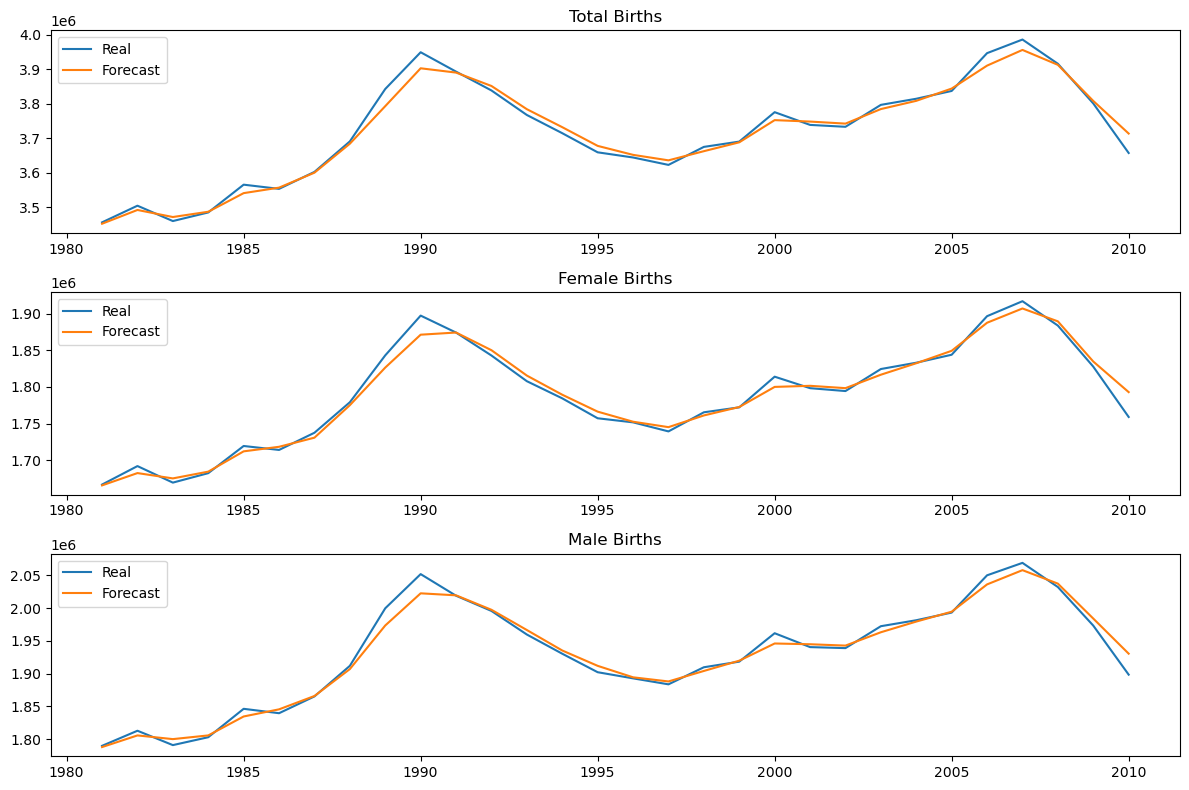

In [12]:
# 绘制真实值和预测值
plt.figure(figsize=(12, 8))
# 总出生人口
plt.subplot(3, 1, 1)
plt.plot(range(1981, 2011), total_births.loc['1981':'2010']['total'], label='Real')
plt.plot(range(1981, 2011), forecast_total, label='Forecast')
plt.title('Total Births')
plt.legend()

# 女性出生人口
plt.subplot(3, 1, 2)
plt.plot(range(1981, 2011), total_births.loc['1981':'2010']['F'], label='Real')
plt.plot(range(1981, 2011), forecast_female, label='Forecast')
plt.title('Female Births')
plt.legend()

# 男性出生人口
plt.subplot(3, 1, 3)
plt.plot(range(1981, 2011), total_births.loc['1981':'2010']['M'], label='Real')
plt.plot(range(1981, 2011), forecast_male, label='Forecast')
plt.title('Male Births')
plt.legend()
# 显示图形
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

# 真实值
real_total = total_births.loc['1981':'2010']['total']
real_female = total_births.loc['1981':'2010']['F']
real_male = total_births.loc['1981':'2010']['M']

# 计算误差率
error_rate_total = np.abs((forecast_total - real_total) / real_total) * 100
error_rate_female = np.abs((forecast_female - real_female) / real_female) * 100
error_rate_male = np.abs((forecast_male - real_male) / real_male) * 100

# 打印误差率
print('Total Error Rate: ', error_rate_total)
print('Female Error Rate: ', error_rate_female)
print('Male Error Rate: ', error_rate_male)

Total Error Rate:  year
1981    0.115297
1982    0.352793
1983    0.338387
1984    0.057896
1985    0.687656
1986    0.098782
1987    0.062320
1988    0.181331
1989    1.294688
1990    1.177417
1991    0.070894
1992    0.338326
1993    0.445805
1994    0.469034
1995    0.510034
1996    0.208978
1997    0.363980
1998    0.338157
1999    0.056111
2000    0.610314
2001    0.258516
2002    0.246987
2003    0.320431
2004    0.158398
2005    0.179798
2006    0.915947
2007    0.754993
2008    0.078763
2009    0.191230
2010    1.541341
Name: total, dtype: float64
Female Error Rate:  year
1981    0.068290
1982    0.563415
1983    0.344598
1984    0.122616
1985    0.425432
1986    0.250364
1987    0.386235
1988    0.225772
1989    0.903596
1990    1.371897
1991    0.003510
1992    0.393358
1993    0.424416
1994    0.276993
1995    0.515074
1996    0.049229
1997    0.333796
1998    0.243000
1999    0.025870
2000    0.768229
2001    0.179264
2002    0.221128
2003    0.425285
2004    0.038718
2005 

In [7]:
# 计算误差率的平均值
avg_error_rate_total = error_rate_total.mean()
avg_error_rate_female = error_rate_female.mean()
avg_error_rate_male = error_rate_male.mean()

# 打印误差率的平均值
print('Average Total Error Rate: ', avg_error_rate_total)
print('Average Female Error Rate: ', avg_error_rate_female)
print('Average Male Error Rate: ', avg_error_rate_male)

Average Total Error Rate:  0.4141535390134067
Average Female Error Rate:  0.41523074542683885
Average Male Error Rate:  0.4219702133587476


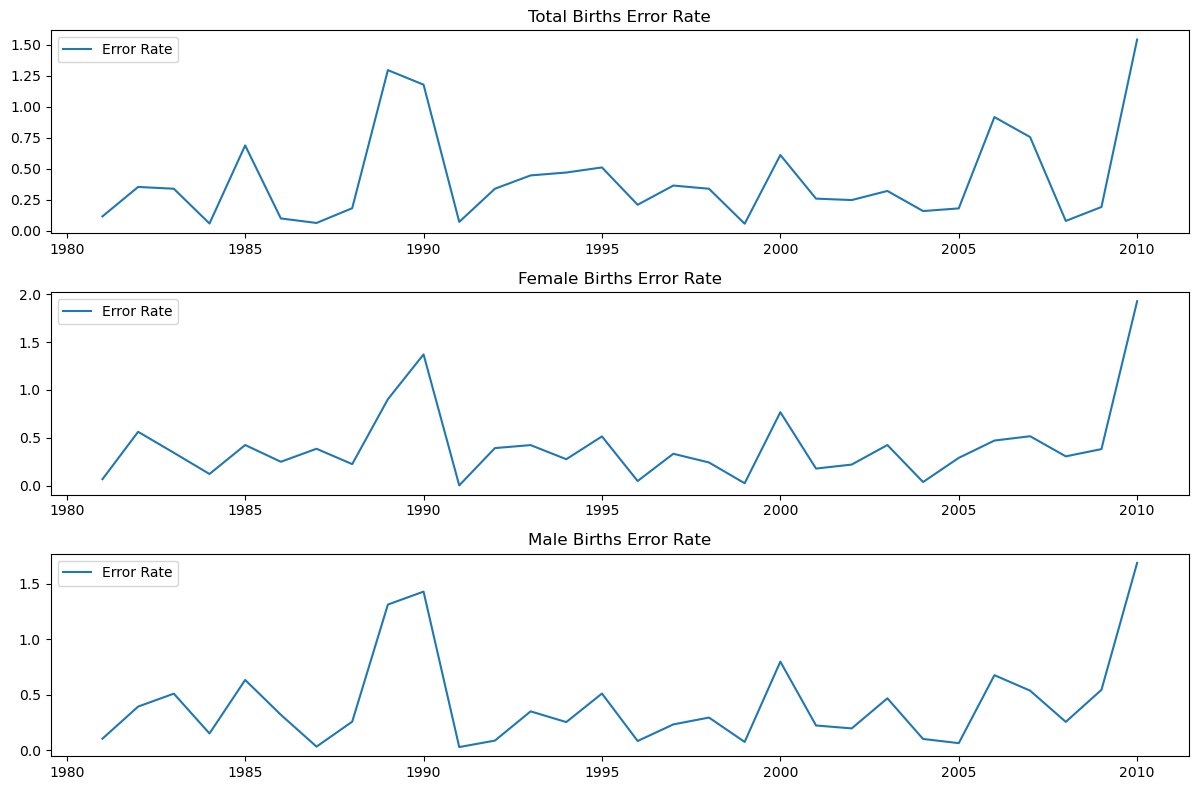

In [8]:
import matplotlib.pyplot as plt

# 绘制误差率
plt.figure(figsize=(12, 8))

# 总出生人口误差率
plt.subplot(3, 1, 1)
plt.plot(range(1981, 2011), error_rate_total, label='Error Rate')
plt.title('Total Births Error Rate')
plt.legend()

# 女性出生人口误差率
plt.subplot(3, 1, 2)
plt.plot(range(1981, 2011), error_rate_female, label='Error Rate')
plt.title('Female Births Error Rate')
plt.legend()

# 男性出生人口误差率
plt.subplot(3, 1, 3)
plt.plot(range(1981, 2011), error_rate_male, label='Error Rate')
plt.title('Male Births Error Rate')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()